<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Objectifs</a></span></li></ul></li><li><span><a href="#Dev" data-toc-modified-id="Dev-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dev</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Industrialisation</a></span></li><li><span><a href="#OLD-Code" data-toc-modified-id="OLD-Code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OLD Code</a></span><ul class="toc-item"><li><span><a href="#Dev-OLD" data-toc-modified-id="Dev-OLD-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dev OLD</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Fonction-de-lecture-OLD" data-toc-modified-id="Fonction-de-lecture-OLD-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Fonction de lecture OLD</a></span></li></ul></li></ul></li><li><span><a href="#Industrialisation-OLD" data-toc-modified-id="Industrialisation-OLD-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Industrialisation OLD</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

from vcub_keeper.config import ROOT_DATA_REF

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objectifs

- Téléchargement des données des attributs des stations Vcub via open data.
- Modification de la structure / Naming afin de coller avec l'ancien fichier `tb_stvel_p.csv` (issue git https://github.com/armgilles/vcub_keeper/issues/50).
- Export des données dans `ROOT_DATA_REF`.
- Lecture du fichier sur les références des stations Vcub à Bordeaux
- Industrialiser

*L'ancien code est noté par `OLD`*

# Dev

In [3]:
URL_DATA_STATION = "https://opendata.bordeaux-metropole.fr/explore/dataset/ci_vcub_p/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

In [4]:
# Lecture des données via URL

column_dtypes = {'IDENT': 'uint8'}
usecols = ['Geo Point', 'Geo Shape', 'commune', 'IDENT',
           'TYPE', 'NOM', 'NBPLACES', 'NBVELOS']



stations = pd.read_csv(URL_DATA_STATION, sep=";",
                       dtype=column_dtypes, usecols=usecols)

In [5]:
stations.tail()

,Geo Point,Geo Shape,commune,IDENT,TYPE,NOM,NBPLACES,NBVELOS
178,"44.866214,-0.60529","{""coordinates"": [-0.60529, 44.866214], ""type"":...",Le Bouscat,181,VLS+,Mairie du Bouscat,8,12
179,"44.873805,-0.629383","{""coordinates"": [-0.629383, 44.873805], ""type""...",Le Bouscat,182,VLS+,Hippodrome,16,4
180,"44.892104,-0.667966","{""coordinates"": [-0.667966, 44.892104], ""type""...",Eysines,183,VLS+,Cantinolle,12,8
181,"44.877905,-0.534293","{""coordinates"": [-0.534293, 44.877905], ""type""...",Lormont,184,VLS+,Lormont bas,11,9
182,"44.823285,-0.554574","{""coordinates"": [-0.554574, 44.823285], ""type""...",Bordeaux,251,VLS,Belcier Gare,18,22


In [6]:
stations.tail()

,Geo Point,Geo Shape,commune,IDENT,TYPE,NOM,NBPLACES,NBVELOS
178,"44.866214,-0.60529","{""coordinates"": [-0.60529, 44.866214], ""type"":...",Le Bouscat,181,VLS+,Mairie du Bouscat,8,12
179,"44.873805,-0.629383","{""coordinates"": [-0.629383, 44.873805], ""type""...",Le Bouscat,182,VLS+,Hippodrome,16,4
180,"44.892104,-0.667966","{""coordinates"": [-0.667966, 44.892104], ""type""...",Eysines,183,VLS+,Cantinolle,12,8
181,"44.877905,-0.534293","{""coordinates"": [-0.534293, 44.877905], ""type""...",Lormont,184,VLS+,Lormont bas,11,9
182,"44.823285,-0.554574","{""coordinates"": [-0.554574, 44.823285], ""type""...",Bordeaux,251,VLS,Belcier Gare,18,22


In [7]:
# Calcul total stand by station
stations['total_stand'] = stations['NBPLACES'] + stations['NBVELOS']

In [8]:
# Create lon / lat
stations['lat'] = stations['Geo Point'].apply(lambda x : x.split(',')[0])
stations['lat'] = stations['lat'].astype(float)
stations['lon'] = stations['Geo Point'].apply(lambda x : x.split(',')[1])
stations['lon'] = stations['lon'].astype(float)

In [9]:
# Naming
# commune -> COMMUNE
stations.rename(columns={'commune':'COMMUNE'}, inplace=True)

# IDENT -> station_id
stations.rename(columns={'IDENT':'station_id'}, inplace=True)

# TYPE -> TYPEA
stations.rename(columns={'TYPE':'TYPEA'}, inplace=True)


In [10]:
# Filter 
col_to_export = ['Geo Point', 'Geo Shape', 'COMMUNE', 'total_stand', 'NOM', 'TYPEA',
                 'station_id', 'lat', 'lon']

stations = stations[col_to_export]

In [11]:
stations

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,station_id,lat,lon
0,"44.83803,-0.58437","{""coordinates"": [-0.58437, 44.83803], ""type"": ...",Bordeaux,33,Meriadeck,VLS,1,44.838030,-0.584370
1,"44.83784,-0.59028","{""coordinates"": [-0.59028, 44.83784], ""type"": ...",Bordeaux,20,St Bruno,VLS,2,44.837840,-0.590280
2,"44.840813,-0.593233","{""coordinates"": [-0.593233, 44.840813], ""type""...",Bordeaux,26,Piscine Judaique,VLS,3,44.840813,-0.593233
3,"44.84221,-0.58482","{""coordinates"": [-0.58482, 44.84221], ""type"": ...",Bordeaux,20,St Seurin,VLS,4,44.842210,-0.584820
4,"44.840712,-0.581124","{""coordinates"": [-0.581124, 44.840712], ""type""...",Bordeaux,40,Place Gambetta,VLS,5,44.840712,-0.581124
...,...,...,...,...,...,...,...,...,...
178,"44.866214,-0.60529","{""coordinates"": [-0.60529, 44.866214], ""type"":...",Le Bouscat,20,Mairie du Bouscat,VLS+,181,44.866214,-0.605290
179,"44.873805,-0.629383","{""coordinates"": [-0.629383, 44.873805], ""type""...",Le Bouscat,20,Hippodrome,VLS+,182,44.873805,-0.629383
180,"44.892104,-0.667966","{""coordinates"": [-0.667966, 44.892104], ""type""...",Eysines,20,Cantinolle,VLS+,183,44.892104,-0.667966
181,"44.877905,-0.534293","{""coordinates"": [-0.534293, 44.877905], ""type""...",Lormont,20,Lormont bas,VLS+,184,44.877905,-0.534293


In [12]:
# Export 
file_export = "station_attribute.csv"
stations.to_csv(ROOT_DATA_REF+file_export, index=False, encoding='UTF-8')

# Industrialisation

In [13]:
def create_station_attribute(path_directory):
    """
    Création du fichier de référence des attributs des stations Vcub de l'agglomération de Bordeaux
    suite à la modification de l'accès open-data des données précédentes
    (https://github.com/armgilles/vcub_keeper/issues/50).
    Export le fichier dans "path_directory" en .csv.

    Parameters
    ----------
    path_directory : str
        chemin d'accès (ROOT_DATA_REF)

    Returns
    -------
    None
    Examples
    --------

    create_station_attribute(path_directory=ROOT_DATA_REF)
    """

    URL_DATA_STATION = "https://opendata.bordeaux-metropole.fr/explore/dataset/ci_vcub_p/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

    # Lecture des données via URL
    column_dtypes = {'IDENT': 'uint8'}
    usecols = ['Geo Point', 'Geo Shape', 'commune', 'IDENT',
               'TYPE', 'NOM', 'NBPLACES', 'NBVELOS']

    stations = pd.read_csv(URL_DATA_STATION, sep=";",
                           dtype=column_dtypes, usecols=usecols)

    # Calcul du nombre de stand par station
    stations['total_stand'] = stations['NBPLACES'] + stations['NBVELOS']

    # Create lon / lat
    stations['lat'] = stations['Geo Point'].apply(lambda x: x.split(',')[0])
    stations['lat'] = stations['lat'].astype(float)
    stations['lon'] = stations['Geo Point'].apply(lambda x: x.split(',')[1])
    stations['lon'] = stations['lon'].astype(float)

    # Naming
    # commune -> COMMUNE
    stations.rename(columns={'commune': 'COMMUNE'}, inplace=True)

    # IDENT -> station_id
    stations.rename(columns={'IDENT': 'station_id'}, inplace=True)

    # TYPE -> TYPEA
    stations.rename(columns={'TYPE': 'TYPEA'}, inplace=True)

    # Filter columns
    col_to_export = ['Geo Point', 'Geo Shape', 'COMMUNE', 'total_stand', 'NOM', 'TYPEA',
                     'station_id', 'lat', 'lon']

    stations = stations[col_to_export]

    # Export
    file_export = "station_attribute.csv"
    stations.to_csv(ROOT_DATA_REF+file_export, index=False, encoding='UTF-8')

    
def read_stations_attributes(path_directory, file_name="station_attribute.csv"):
    """
    Lecture du fichier sur les attributs des Vcub à Bordeaux. Ce fichier provient de
    create.creator.py - create_station_attribute()

    Parameters
    ----------
    path_directory : str
        chemin d'accès (ROOT_DATA_REF)
    file_name : str
        Nom du fichier

    Returns
    -------
    activite : DataFrame

    Examples
    --------

    stations = read_stations_attributes(path_directory=ROOT_DATA_REF)
    """

    column_dtypes = {'station_id': 'uint8'}

    stations = pd.read_csv(path_directory+file_name, sep=',',
                           dtype=column_dtypes)

    return stations
    

In [14]:
from vcub_keeper.create.creator import create_station_attribute
from vcub_keeper.reader.reader import read_stations_attributes

In [15]:
create_station_attribute(path_directory=ROOT_DATA_REF)

In [16]:
stations = read_stations_attributes(path_directory=ROOT_DATA_REF)

In [17]:
stations.shape

(183, 9)

In [18]:
stations

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,station_id,lat,lon
0,"44.83803,-0.58437","{""coordinates"": [-0.58437, 44.83803], ""type"": ...",Bordeaux,33,Meriadeck,VLS,1,44.838030,-0.584370
1,"44.83784,-0.59028","{""coordinates"": [-0.59028, 44.83784], ""type"": ...",Bordeaux,20,St Bruno,VLS,2,44.837840,-0.590280
2,"44.840813,-0.593233","{""coordinates"": [-0.593233, 44.840813], ""type""...",Bordeaux,26,Piscine Judaique,VLS,3,44.840813,-0.593233
3,"44.84221,-0.58482","{""coordinates"": [-0.58482, 44.84221], ""type"": ...",Bordeaux,20,St Seurin,VLS,4,44.842210,-0.584820
4,"44.840712,-0.581124","{""coordinates"": [-0.581124, 44.840712], ""type""...",Bordeaux,40,Place Gambetta,VLS,5,44.840712,-0.581124
...,...,...,...,...,...,...,...,...,...
178,"44.866214,-0.60529","{""coordinates"": [-0.60529, 44.866214], ""type"":...",Le Bouscat,20,Mairie du Bouscat,VLS+,181,44.866214,-0.605290
179,"44.873805,-0.629383","{""coordinates"": [-0.629383, 44.873805], ""type""...",Le Bouscat,20,Hippodrome,VLS+,182,44.873805,-0.629383
180,"44.892104,-0.667966","{""coordinates"": [-0.667966, 44.892104], ""type""...",Eysines,20,Cantinolle,VLS+,183,44.892104,-0.667966
181,"44.877905,-0.534293","{""coordinates"": [-0.534293, 44.877905], ""type""...",Lormont,20,Lormont bas,VLS+,184,44.877905,-0.534293


<AxesSubplot:xlabel='lat', ylabel='lon'>

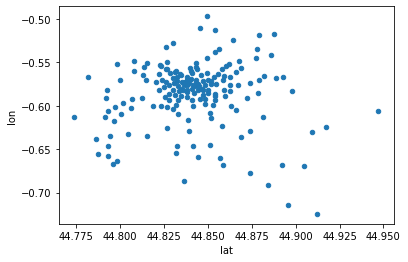

In [19]:
stations.plot(kind='scatter', x='lat', y='lon')

# OLD Code

## Dev OLD

In [36]:
file_name = "tb_stvel_p.csv"
column_dtypes = {'NUMSTAT': 'uint8'}

usecols = ['Geo Point', 'Geo Shape', 'COMMUNE', 'NBSUPPOR',
          'NOM', 'TYPEA', 'ADRESSE', 'TARIF', 'NUMSTAT']
stations = pd.read_csv(ROOT_DATA_REF+file_name, sep=';',
                           dtype=column_dtypes, usecols=usecols)

# Naming
stations.rename(columns={'NBSUPPOR': 'total_stand'}, inplace=True)
stations.rename(columns={'NUMSTAT': 'station_id'}, inplace=True)

# Create lon / lat
stations['lat'] = stations['Geo Point'].apply(lambda x : x.split(',')[0])
stations['lat'] = stations['lat'].astype(float)
stations['lon'] = stations['Geo Point'].apply(lambda x : x.split(',')[1])
stations['lon'] = stations['lon'].astype(float)

In [37]:
stations.shape

(174, 11)

In [38]:
stations.head()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
0,"44.8351755,-0.5720497","{""type"": ""Point"", ""coordinates"": [-0.5720497, ...",BORDEAUX,17,Grosse Cloche (fermée depuis le 26/09/2016. Ré...,VCUB,12 place de la Ferme de Richemont,VLS,104,44.835175,-0.572050
1,"44.8723721,-0.5906954","{""type"": ""Point"", ""coordinates"": [-0.5906954, ...",BRUGES,20,Bruges La Vache,VCUB,Rue Léopold Laplante,VLS PLUS,169,44.872372,-0.590695
2,"44.8500962,-0.5855819","{""type"": ""Point"", ""coordinates"": [-0.5855819, ...",BORDEAUX,16,Place Marie Brizard (supprimée le 11 mars 2016...,VCUB,209 rue Fondaudège,VLS,35,44.850096,-0.585582
3,"44.8492876,-0.4966899","{""type"": ""Point"", ""coordinates"": [-0.4966899, ...",ARTIGUES-PRES-BORDEAUX,19,Artigues Feydeau,VCUB,22 Boulevard Feydeau,VLS PLUS,150,44.849288,-0.496690
4,"44.7821503,-0.5661566","{""type"": ""Point"", ""coordinates"": [-0.5661566, ...",VILLENAVE-D'ORNON,21,Pont de la Maye (retirée le 19 novembre 2015 e...,VCUB,face au 564 route de Toulouse,VLS PLUS,76,44.782150,-0.566157


In [40]:
stations.columns

Index(['Geo Point', 'Geo Shape', 'COMMUNE', 'total_stand', 'NOM', 'TYPEA',
       'ADRESSE', 'TARIF', 'station_id', 'lat', 'lon'],
      dtype='object')

<AxesSubplot:xlabel='lat', ylabel='lon'>

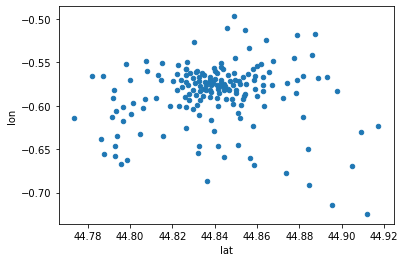

In [6]:
stations.plot(kind='scatter', x='lat', y='lon')

#### Fonction de lecture OLD

In [12]:
def read_stations_attributes(path_directory, file_name="tb_stvel_p.csv"):
    """
    Lecture du fichier sur les attributs des Vcub à Bordeaux.
    Ce fichier est situé dans ROOT_DATA_REF
    Modification par rapport au fichier original : 
        - Changement de nom des colonnnes :
            - NBSUPPOR -> total_stand
            - NUMSTAT -> station_id
        - Création des features lon & lat features from 'Geo Point'
    
    Parameters
    ----------
    path_directory : str
        chemin d'accès (ROOT_DATA_REF)
    file_name : str
        Nom du fichier
    
    Returns
    -------
    activite : DataFrame
        
    Examples
    --------
    
    stations = read_stations_attributes(path_directory=ROOT_DATA_REF)
    """
    
    column_dtypes = {'NUMSTAT': 'uint8'}
    usecols = ['Geo Point', 'Geo Shape', 'COMMUNE', 'NBSUPPOR',
              'NOM', 'TYPEA', 'ADRESSE', 'TARIF', 'NUMSTAT']
    
    stations = pd.read_csv(path_directory+file_name, sep=';',
                           dtype=column_dtypes, usecols=usecols)

    # Naming
    stations.rename(columns={'NBSUPPOR': 'total_stand'}, inplace=True)
    stations.rename(columns={'NUMSTAT': 'station_id'}, inplace=True)

    # Create lon / lat
    stations['lat'] = stations['Geo Point'].apply(lambda x : x.split(',')[0])
    stations['lat'] = stations['lat'].astype(float)
    stations['lon'] = stations['Geo Point'].apply(lambda x : x.split(',')[1])
    stations['lon'] = stations['lon'].astype(float)
    
    return stations

In [8]:
stations = read_stations_attributes()

In [9]:
stations.tail()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
169,"44.8059145,-0.6023231","{""type"": ""Point"", ""coordinates"": [-0.6023231, ...",TALENCE,40,Arts et Métiers,VCUB,"av des Facultés, derrière la station Tram.",VLS,112,44.805915,-0.602323
170,"44.8669415,-0.5760778","{""type"": ""Point"", ""coordinates"": [-0.5760778, ...",LE BOUSCAT,20,Le Bouscat Ravezies,VCUB,"allée de Boutaut, au niveau du P+R",VLS,118,44.866942,-0.576078
171,"44.826297,-0.5570718","{""type"": ""Point"", ""coordinates"": [-0.5570718, ...",BORDEAUX,22,Gare St Jean,VCUB,rue St Vincent de Paul (terminus bus),VLS,127,44.826297,-0.557072
172,"44.8282573,-0.5623689","{""type"": ""Point"", ""coordinates"": [-0.5623689, ...",BORDEAUX,25,Place André Meunier (fermée le 16/11/2016. Réo...,VCUB,"Cours Barbey, à l'angle avec le cours de la Marne",VLS,137,44.828257,-0.562369
173,"44.7968805,-0.6018689","{""type"": ""Point"", ""coordinates"": [-0.6018689, ...",TALENCE,20,Ecole de Management,VCUB,"cours de la Libération, devant BEM",VLS,113,44.796881,-0.601869


## Industrialisation OLD

In [8]:
from vcub_keeper.reader.reader import read_stations_attributes
from vcub_keeper.config import ROOT_DATA_REF

In [9]:
stations = read_stations_attributes(path_directory=ROOT_DATA_REF)

In [10]:
stations.head()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
0,"44.8351755,-0.5720497","{""type"": ""Point"", ""coordinates"": [-0.5720497, ...",BORDEAUX,17,Grosse Cloche (fermée depuis le 26/09/2016. Ré...,VCUB,12 place de la Ferme de Richemont,VLS,104,44.835175,-0.572050
1,"44.8723721,-0.5906954","{""type"": ""Point"", ""coordinates"": [-0.5906954, ...",BRUGES,20,Bruges La Vache,VCUB,Rue Léopold Laplante,VLS PLUS,169,44.872372,-0.590695
2,"44.8500962,-0.5855819","{""type"": ""Point"", ""coordinates"": [-0.5855819, ...",BORDEAUX,16,Place Marie Brizard (supprimée le 11 mars 2016...,VCUB,209 rue Fondaudège,VLS,35,44.850096,-0.585582
3,"44.8492876,-0.4966899","{""type"": ""Point"", ""coordinates"": [-0.4966899, ...",ARTIGUES-PRES-BORDEAUX,19,Artigues Feydeau,VCUB,22 Boulevard Feydeau,VLS PLUS,150,44.849288,-0.496690
4,"44.7821503,-0.5661566","{""type"": ""Point"", ""coordinates"": [-0.5661566, ...",VILLENAVE-D'ORNON,21,Pont de la Maye (retirée le 19 novembre 2015 e...,VCUB,face au 564 route de Toulouse,VLS PLUS,76,44.782150,-0.566157


In [11]:
stations.shape

(174, 11)